In [61]:
import matplotlib.pyplot as plt
import numpy as np
import athena_read
import array as ar 
import os

In [62]:
# Function for the theta component of velocity feild
def v_theta(t,p,N,a,theta_0):
    z = (1/np.tan(t/2))*np.exp(1j*p) #plug grids into z and zbar
    zbar = (1/np.tan(t/2))*np.exp(-(1j*p))
    
    s_max = 1/(np.tan(theta_0/2))
    c_2 = (s_max**2)*(N+1) + (N-1)
    c_1 = 2*a*((s_max)**N)*(1-((s_max)**2))
    c_0 = (N-1)+((N+1)*((s_max)**2))-((N+1)*(a**2)*((s_max)**(2*N)))-((N-1)*(a**2)*((s_max)**((2*N)+2)))
    b = ((-c_1) + (np.sqrt((c_1**2)-(4*c_2*c_0))))/(2*c_2)
    
    zmag2 = z*zbar
    vcoef = 1j*(zmag2 +1)/(2*np.sqrt(zmag2)) #From equation 4.3
    g = a*(z**N)+b
    h = a*(zbar**N)+b
    frac = (N*a*b*((z**N) - (zbar**N)))/(1 + (g*h))
    return vcoef*frac

In [63]:
# Function for the phi component of velocity field
def v_phi(t,p,N,a,theta_0):    
    z = (1/np.tan(t/2))*np.exp(1j*p) #plug grids into z and zbar
    zbar = (1/np.tan(t/2))*np.exp(-(1j*p))
    
    s_max = 1/(np.tan(theta_0/2))
    c_2 = (s_max**2)*(N+1) + (N-1)
    c_1 = 2*a*((s_max)**N)*(1-((s_max)**2))
    c_0 = (N-1)+((N+1)*((s_max)**2))-((N+1)*(a**2)*((s_max)**(2*N)))-((N-1)*(a**2)*((s_max)**((2*N)+2)))
    b = ((-c_1) + (np.sqrt((c_1**2)-(4*c_2*c_0))))/(2*c_2)
    
    zmag2 = z*zbar
    ucoef = -(zmag2 +1)/(2*np.sqrt(zmag2)) #From equation 4.3
    frac1 = ((N-1)*(1+zmag2)+2*zmag2)/(1+zmag2)
    g = a*(z**N)+b
    h = a*(zbar**N)+b
    frac2 = (N*a*((z**N)*h + (zbar**N)*g))/(1 + (g*h))
    return ucoef*(frac1-frac2)

In [64]:
#Function for theta component of velocity field when N=0
def v_theta_0(t,p):
    return 0*t +0*p

In [65]:
#Function for phi component of velocity field when N=0
def v_phi_0(t,p):
    z = (1/np.tan(t/2))*np.exp(1j*p) #plug grids into z and zbar
    zbar = (1/np.tan(t/2))*np.exp(-(1j*p))
    
    zmag2 = z*zbar
    return zmag2/np.sqrt(zmag2)

In [66]:
# Extract Athena++ grid from test problem
run_name = 'grid' # Test run name
dump_dir = 'input_grid_directory' + run_name + '/' #Directory for Athena test run
dump_tag = 'Blast.block0.out1.' # vtk file name
i_dump = 15 # vtk file number

In [67]:
# Where to write file
path_to_athena = 'output_directory'
write_path = path_to_athena + 'where_to_write'

In [68]:
# Load cell edge grid from Athena test file
dump = dump_tag + str(i_dump).zfill(5) + '.vtk'
athena_dic = athena_read.vtk(dump_dir + dump)
theta, phi = athena_dic[1], athena_dic[2]

FileNotFoundError: [Errno 2] No such file or directory: 'input_grid_directorygrid/Blast.block0.out1.00015.vtk'

In [69]:
# Calculate cell centered grid
theta_c = theta[:-1] + 0.5 * np.ediff1d(theta) #take theta component, delete 'j' character from string,
phi_c = phi[:-1] + 0.5 * np.ediff1d(phi) #add half the difference of adjacent angle values in the array

In [70]:
# Theta indices
theta_indices = ar.array('i',(i for i in range(0,len(theta_c),1)))
print(theta_indices) #Check

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])


In [71]:
# Generate cell-centered meshgrid grid
theta_c_grid, phi_c_grid = np.meshgrid(theta_c,phi_c)
print("phi_c.shape = {}, theta_c.shape = {}".format(phi_c.shape,theta_c.shape)) #same size?

phi_c.shape = (128,), theta_c.shape = (128,)


In [72]:
# Define function inputs
t = theta_c_grid
p = phi_c_grid

# Define parameter values
N=2
a=2
theta_0=np.pi/2

In [73]:
# Take function values for input grid
if N==0:
    v_t = v_theta_0(t,p)
    v_p = v_phi_0(t,p)
else:
    v_t = v_theta(t,p,N,a,theta_0)
    v_p = v_phi(t,p,N,a,theta_0)

In [74]:
# Plug everything into the functions
v_t = v_theta(t,p,N,a,theta_0)
v_p = v_phi(t,p,N,a,theta_0)

In [75]:
f = open(write_path + run_name + '_N1-a1-t2' + '_' + '128' + 'by' + '128' + '.tab', 'w') # Create a file
print ("\nWriting output to\n: {}".format(write_path)) #check
# Write velocities at each point on the grid to a tab file
for k in range(len(phi_c)):
    print ("phi = {} deg".format(phi_c[k]*180./np.pi)) #check
    for j in range(len(theta_c)):
        if N==0:
            f.write(repr(v_t[k,j])); f.write('\t')
            f.write(repr(v_p[k,j])[1:-4]); f.write('\t')
            f.write('\n')
        else:
            f.write(repr(v_t[k,j])[1:-4]); f.write('\t')
            f.write(repr(v_p[k,j])[1:-4]); f.write('\t')
            f.write('\n')
f.close()


Writing output to
: output_directorywhere_to_write
phi = 1.4062500391324713 deg
phi = 4.2187501173974145 deg
phi = 7.031250088940651 deg
phi = 9.843750167205593 deg
phi = 12.656250032027124 deg
phi = 15.468749896848657 deg
phi = 18.28124976167019 deg
phi = 21.093750053378542 deg
phi = 23.906250345086896 deg
phi = 26.718749783021604 deg
phi = 29.53124922095631 deg
phi = 32.343749512664665 deg
phi = 35.15625065814667 deg
phi = 37.96875009608137 deg
phi = 40.781249534016084 deg
phi = 43.593750679498086 deg
phi = 46.40625011743279 deg
phi = 49.2187495553675 deg
phi = 52.0312507008495 deg
phi = 54.84375013878421 deg
phi = 57.65624786917162 deg
phi = 60.468747307106334 deg
phi = 63.28124845258833 deg
phi = 66.09374959807033 deg
phi = 68.90625074355233 deg
phi = 71.71875188903434 deg
phi = 74.53124961942174 deg
phi = 77.34374734980916 deg
phi = 80.15624849529117 deg
phi = 82.96874964077317 deg
phi = 85.78125078625517 deg
phi = 88.59375193173717 deg
phi = 91.40624966212458 deg
phi = 94.218747

In [76]:
#Plot the velocity field as a check
#Define grids - projected onto cartesian basis
x_grid = np.sin(theta_c_grid) * np.cos(phi_c_grid)
y_grid = np.sin(theta_c_grid) * np.sin(phi_c_grid)
z_grid = np.cos(theta_c_grid)

v_x = v_theta(t,p,N,a,theta_0)*np.cos(theta_c_grid)*np.cos(phi_c_grid) - v_phi(t,p,N,a,theta_0)*np.sin(phi_c_grid)
v_y = v_theta(t,p,N,a,theta_0)*np.cos(theta_c_grid)*np.sin(phi_c_grid) + v_phi(t,p,N,a,theta_0)*np.cos(phi_c_grid)
v_z = -v_theta(t,p,N,a,theta_0)*np.sin(theta_c_grid)

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

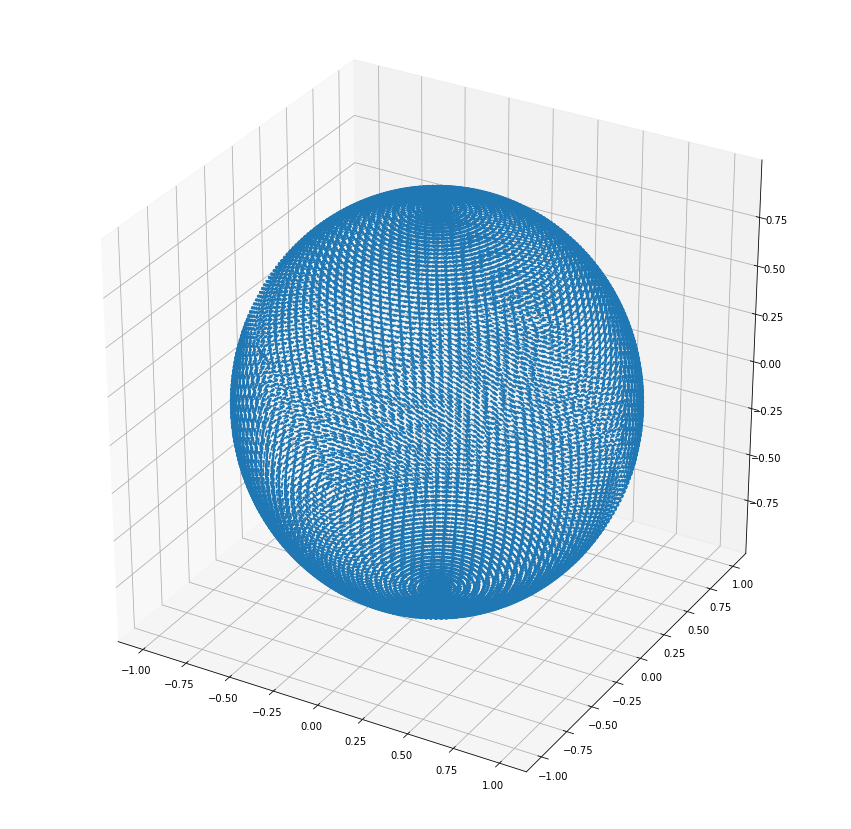

In [82]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.quiver(x_grid, y_grid, z_grid, v_x, v_y, v_z, length=0.04, normalize=True, arrow_length_ratio=0.5)
plt.show()